In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import pyopenms as poms
from scipy.signal import savgol_filter
from bokeh.io import output_notebook, show, export_png
import matplotlib.pyplot as plt

output_notebook()

# set global plotting backend for pandas
pd.options.plotting.backend = "ms_matplotlib" # one of: "ms_bokeh" "ms_matplotlib" "ms_plotly"

Loading BokehJS ...

In [2]:
# # Download test file
# import requests

# url = 'https://raw.githubusercontent.com/Roestlab/massdash/dev/test/test_data/ionMobilityTest2/ionMobilityTest2.mzML'
# file_name = 'ionMobilityTest2.mzML'

# # Send a GET request to the URL
# response = requests.get(url)

# # Save the content of the response to a file
# with open(file_name, 'wb') as file:
#     file.write(response.content)

# print(f'File {file_name} downloaded successfully!')


In [3]:
input_file = "./ionMobilityTest2.mzML"

exp = poms.MSExperiment()
poms.MzMLFile().load(input_file, exp)
df = exp.get_df()
df["MS level"] = [spec.getMSLevel() for spec in exp]
precs = []
for spec in exp:
    p = spec.getPrecursors()
    if p:
        precs.append(p[0].getMZ())
    else:
        precs.append(np.nan)
df["precursor m/z"] = precs
df["max intensity m/z"] = df.apply(
    lambda x: x["mzarray"][x["intarray"].argmax()], axis=1
)
# Explode mzarray and intarray columns to make the DataFrame long
df = df.explode(['mzarray', 'intarray'])

# Optionally reset the index for clean indexing
df = df.reset_index(drop=True)
df.head()

,RT,mzarray,intarray,MS level,precursor m/z,max intensity m/z
0,6225.005106,95.418738,8.999689,1,0.0,830.455631
1,6225.005106,95.522638,267.017792,1,0.0,830.455631
2,6225.005106,95.534865,10.000211,1,0.0,830.455631
3,6225.005106,96.153359,25.000689,1,0.0,830.455631
4,6225.005106,96.409607,8.999689,1,0.0,830.455631


/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_core.py:730: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna(0)


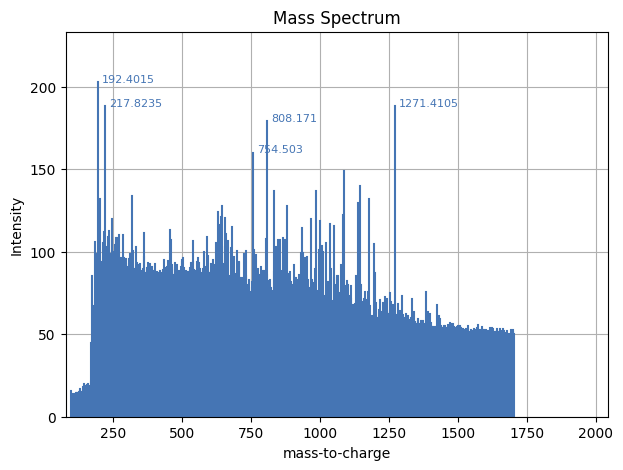

In [4]:
df.plot(kind="spectrum", x="mzarray", y="intarray", width=700)

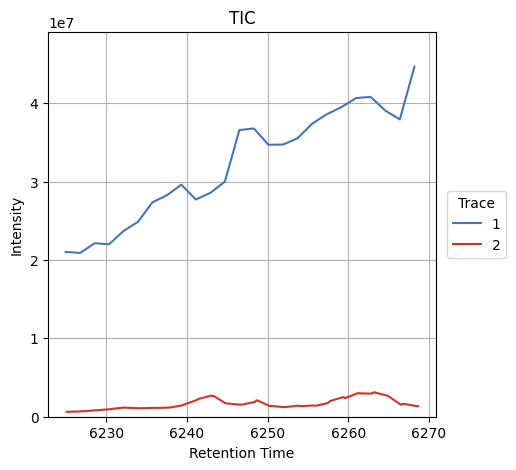

In [5]:
df\
.groupby(['RT', "MS level"])\
.sum()\
.reset_index()\
.plot(kind="chromatogram", x="RT", y="intarray", title="TIC", by="MS level")